In [11]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
from matplotlib import pyplot as plt

# Import packages for statistical analysis/hypothesis testing
from scipy import stats

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
data = pd.read_csv("tiktok_dataset.csv")

### Data exploration and cleaning

In [3]:
# Display and examine the first few rows of the dataframe
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.5+ MB


In [5]:
# Generate a table of descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [ ]:
# Create a single figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))  # Adjust figsize as needed

# First subplot - boxplot
ax1.set_title('Video Duration Distribution')
sns.boxplot(x=data['video_duration_sec'], ax=ax1)

# Second subplot - histogram
ax2.set_title('Video Duration Histogram')
sns.histplot(data['video_duration_sec'], bins=range(0, 61, 5), ax=ax2)

plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area
plt.show()

All videos are 5-60 seconds in length, and the distribution is uniform.

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))  # Adjust figsize as needed

# First subplot - boxplot
ax1.set_title('Video View Count Distribution')
sns.boxplot(x=data['video_view_count'], ax=ax1)

# Second subplot - histogram
ax2.set_title('Video View Count Histogram')
sns.histplot(data['video_view_count'], bins=range(0, 10**6+1, 10**5), ax=ax2)

plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area
plt.show()

This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

In [ ]:
# Create a single figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))  # Adjust figsize as needed

# First subplot - boxplot
ax1.set_title('Video Like Count Distribution')
sns.boxplot(x=data['video_like_count'], ax=ax1)

# Second subplot - histogram
ax2.set_title('Video Like Count Histogram')
ax = sns.histplot(data['video_like_count'], bins=range(0, 7 * 10**5 + 1, 10**5), ax=ax2)
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0, 7 * 10**5 + 1, 10**5))
ax.set_xticklabels(labels)

plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area
plt.show()

Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.

In [ ]:
# Create a single figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))  # Adjust figsize as needed

# First subplot - boxplot
ax1.set_title('Video Comment Count Distribution')
sns.boxplot(x=data['video_comment_count'], ax=ax1)

# Second subplot - histogram
ax2.set_title('Video Comment Count Histogram')
sns.histplot(data['video_comment_count'], bins=range(0, 3001, 100), ax=ax2)

plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area
plt.show()

Again, the vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

In [ ]:
# Create a single figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))  # Modify figsize as needed

# First subplot - boxplot
ax1.set_title('Video Share Count Distribution')
sns.boxplot(x=data['video_share_count'], ax=ax1)

# Second subplot - histogram
ax2.set_title('Video Share Count Histogram')
sns.histplot(data['video_share_count'], bins=range(0, 270001, 10000), ax=ax2)

plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area
plt.show()

The overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

In [ ]:
# Create a single figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))  # Adjust figsize as needed

# First subplot - boxplot
ax1.set_title('Video Download Count Distribution')
sns.boxplot(x=data['video_download_count'], ax=ax1)

# Second subplot - histogram
ax2.set_title('Video Download Count Histogram')
sns.histplot(data['video_download_count'], bins=range(0, 15001, 500), ax=ax2)

plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area
plt.show()

The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

#### **Claim status by verification status**

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.

#### **Claim status by author ban status**

In [ ]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

It's evident that there's a higher number of active authors compared to banned authors or those under review for both claim and opinion videos. However, when comparing the proportions, active authors represent a significantly larger percentage of the total for opinion videos than for claim videos. This suggests that authors producing claim videos face a higher likelihood of undergoing review or being banned from the platform. There's a disparity in the rate at which claim video authors encounter scrutiny or face sanctions compared to those creating opinion-based content.

#### **Median view counts by ban status**

In [ ]:
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

It appears that the median view counts for non-active authors significantly surpass the median view counts for active authors. Given that non-active authors are more inclined to post claims and their videos accumulate substantially higher views on average compared to videos by active authors, the video_view_count metric seems to hold potential as an indicator of claim status.

Upon a rapid assessment of the median view count based on claim status, it validates this hypothesis by showcasing discrepancies in view counts depending on the claim status of the authors.

#### **Total views by claim status**

In [6]:
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

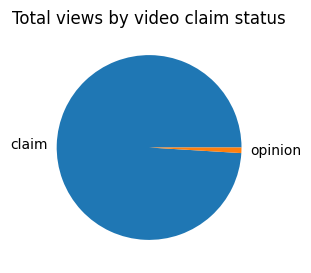

In [7]:
fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

### Hypothesis testing

Your hypotheses are set up well for assessing the difference in the number of views between TikTok videos posted by verified and unverified accounts.

The null hypothesis (H0) assumes no difference in the mean number of views between videos from verified and unverified accounts. It suggests that any observed distinction in the sample data is solely due to random chance or sampling variability.

On the other hand, the alternative hypothesis (H1) posits that there is indeed a difference in the mean number of views between these videos from verified and unverified accounts. It suggests that any dissimilarity observed in the sample data is reflective of an actual distinction in the corresponding population means.

This framework will help in statistically analyzing the sample data to determine whether any observed differences in view counts between these video categories are statistically significant or if they're likely due to random fluctuations in the sample.

In [9]:
# Drop rows with missing values
data = data.dropna(axis=0)

In [10]:
# Conduct a two-sample t-test to compare means
#5% as the significance level 

# Save each sample in a variable
not_verified = data[data["verified_status"] == "not verified"]["video_view_count"]
verified = data[data["verified_status"] == "verified"]["video_view_count"]

# Implement a t-test using the two samples
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

Since the p-value is extremely small (much smaller than the significance level of 5%), null hypothesis was rejected. There is a statistically significant difference in the mean video view count between verified and unverified accounts on TikTok.

This suggests there might be fundamental behavioral differences between these two groups of accounts.
Exploring possibilities such as whether unverified accounts tend to post more clickbait-style content or if they might be associated with spam bots artificially inflating view counts could shed light on this phenomenon.
Analyzing the content strategies, engagement patterns, or potential involvement of automated or deceptive practices in view count enhancement by unverified accounts compared to verified ones might offer insights into the distinct behaviors influencing the observed difference in average view counts. Understanding these underlying factors could help in devising strategies for maintaining platform integrity and ensuring a more equitable and genuine user experience on TikTok.

### **Feature engineering**

In [12]:
# Check class balance
data["claim_status"].value_counts(normalize=True)

claim      0.503458
opinion    0.496542
Name: claim_status, dtype: float64

In [13]:
data['text_length'] = data['video_transcription_text'].str.len()
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [ ]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

sns.histplot(data=data, stat="count", multiple="dodge", x="text_length",
             kde=False, palette="pastel", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()

The distributions of letter counts for both claim and opinion videos exhibit an approximate normal shape with a slight right skew. Notably, claim videos tend to contain more characters, averaging around 13 characters more than opinions, as previously noted. This distinction in character count suggests a consistent difference in the length or complexity of text conveyed in claim videos compared to opinions. Despite both distributions displaying a similar shape, the average character count variance between these video types implies a systematic difference in textual content length or depth.

### Feature selection and transformation

In [14]:
X = data.copy()
# Drop unnecessary columns
X = X.drop(['#', 'video_id'], axis=1)
# Encode target variable
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})
# Dummy encode remaining categorical values
X = pd.get_dummies(X,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)
X.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


In [15]:
# Isolate target variable
y = X['claim_status']
# Isolate features
X = X.drop(['claim_status'], axis=1)

In [17]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)
# Get shape of each training, validation, and testing set
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

The feature video_transcription_text is text-based. It is not a categorical variable, since it does not have a fixed number of possible values. One way to extract numerical features from it is through a bag-of-words algorithm like CountVectorizer.

In [18]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [23]:
# Extract numerical features from `video_transcription_text` in the training set
count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())
# Concatenate `X_train` and `count_df` to form the final dataframe for training data (`X_train_final`)
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

In [24]:
# Extract numerical features from `video_transcription_text` in the testing set
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
# Place the numerical representation of `video_transcription_text` from validation set into a dataframe
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

In [25]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())

# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.0,16591.0,622.0,312.0,107,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.0,36.0,17.0,1.0,69,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,344163.0,57608.0,8578.0,2942.0,90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.0,847.0,17.0,5.0,76,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.0,15348.0,252.0,91.0,72,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Build models

### **Build a random forest model**

In [28]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [29]:
rf_cv.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [30]:
rf_cv.best_score_

0.9948228253467271

In [31]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

### **Build an XGBoost model**

In [32]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [33]:
xgb_cv.fit(X_train_final, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [34]:
xgb_cv.best_score_

0.9906808769992594

In [35]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

## Evaluate models

#### **Random forest**

In [36]:
# Use the random forest "best estimator" model to get predictions on the validation set
y_pred = rf_cv.best_estimator_.predict(X_val_final)

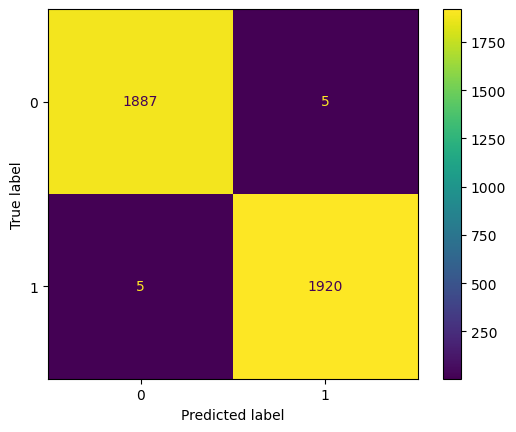

In [37]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [38]:
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



The classification report above shows that the random forest model scores were nearly perfect. The confusion matrix indicates that there were 10 misclassifications&mdash;five false postives and five false negatives.

#### **XGBoost**

In [39]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(X_val_final)

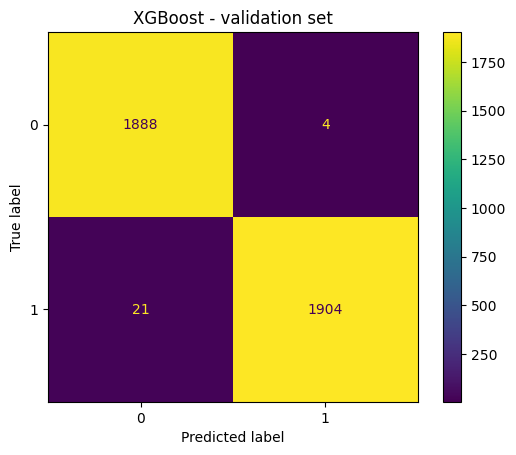

In [40]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('XGBoost - validation set');
plt.show()

In [41]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



The results of the XGBoost model were also nearly perfect. However, its errors tended to be false negatives. Identifying claims was the priority, so it's important that the model be good at capturing all actual claim videos. The random forest model has a better recall score, and is therefore the champion model.

### **Use champion model to predict on test data**

In [42]:
# Use champion model to predict on test data
y_pred = rf_cv.best_estimator_.predict(X_test_final)

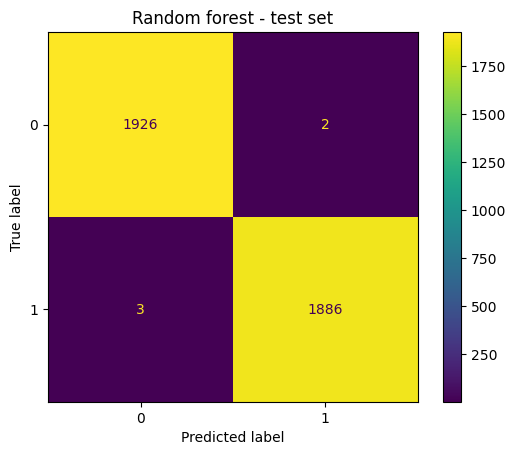

In [43]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Random forest - test set');
plt.show()

#### **Feature importances of champion model**

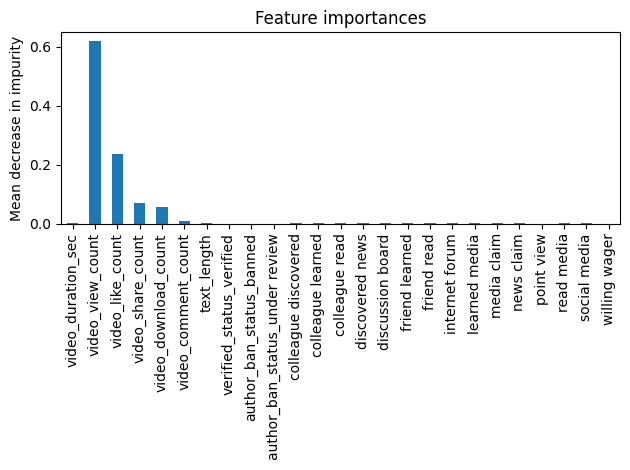

In [44]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

The most predictive features all were related to engagement levels generated by the video. This is not unexpected, as analysis from prior EDA pointed to this conclusion.

## **Conclusion**

The model seems quite robust, showcasing high performance on both the validation and test holdout data, with consistently high precision and F1 scores across classifications of claims and opinions. Its success in accurately categorizing these videos suggests its reliability.

Regarding its predictive mechanism, the model heavily relies on user engagement metrics associated with each video, such as views, likes, shares, and downloads. These metrics likely serve as strong indicators for distinguishing between claims and opinions.

While the model currently performs exceptionally well, there might still be room for enhancing its predictive capabilities through additional features. Incorporating the number of times a video was reported could offer valuable insights into the video's credibility or controversial nature. Furthermore, having the total count of user reports across all videos posted by each author could provide a broader perspective on an author's overall content and potential influence on classification.

These additional features, particularly data related to reporting frequency and aggregated user reports per author, could potentially refine the model's predictive capacity by offering a deeper understanding of video and author behaviors, possibly leading to even more accurate classifications.